In [354]:
from dgpsi import dgp, kernel, combine, container, lgp, path, emulator, gp
import numpy as np
import matplotlib.pyplot as plt

## DGP emulation

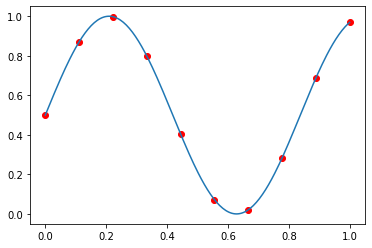

In [285]:
#First model
n=10
X1=np.linspace(0,1.,n)[:,None]
f1= lambda x: (np.sin(7.5*x)+1)/2
Y1=np.array([f1(x) for x in X1]).reshape(-1,1)
Xt=np.linspace(0,1.,200)[:,None]
Yt=np.array([f1(x) for x in Xt]).flatten()
plt.plot(Xt,Yt)
plt.scatter(X1,Y1,color='r')

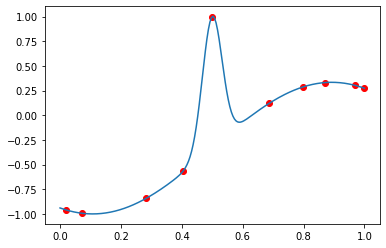

In [286]:
#Second model
X2=Y1
f2= lambda x: 2/3*np.sin(2*(2*x-1))+4/3*np.exp(-30*(2*(2*x-1))**2)-1/3  
Y2=np.array([f2(x) for x in X2]).reshape(-1,1)
Xt=np.linspace(0,1.,200)[:,None]
Yt=np.array([f2(x) for x in Xt]).flatten()
plt.plot(Xt,Yt)
plt.scatter(X2,Y2,color='r')

In [292]:
layer1=[kernel(length=np.array([1.]),name='matern2.5')]
layer2=[kernel(length=np.array([1.]),name='matern2.5',scale_est=True,connect=np.arange(1))]
all_layer=combine(layer1,layer2)
m=dgp(X1,[Y2],all_layer)
m.train(N=500)

Iteration 500: Layer 2: 100%|██████████| 500/500 [00:10<00:00, 46.95it/s]


In [293]:
final_layer_obj=m.estimate()
emu=emulator(final_layer_obj)
mu,var=emu.predict(Xt, method='mean_var')

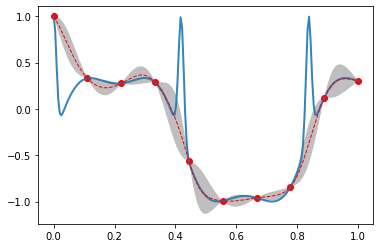

In [294]:
Yt=np.array([f2(f1(x)) for x in Xt]).flatten()
s=np.sqrt(var)
u=mu+2*s
l=mu-2*s
plt.fill_between(Xt.flatten(), u.flatten(), l.flatten(),facecolor='grey',alpha=0.5)
plt.plot(Xt,Yt,lw=2,alpha=0.9)
p=plt.plot(Xt,mu,'--',color='r',alpha=1,lw=1)
plt.scatter(X1,Y2,color='r')

## Linked GP+DGP with sequential design

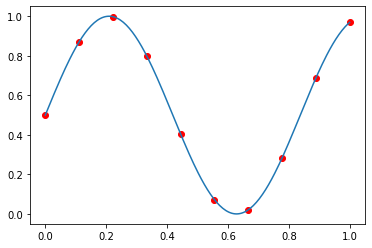

In [295]:
#First model
n=10
X1=np.linspace(0,1.,n)[:,None]
f1= lambda x: (np.sin(7.5*x)+1)/2
Y1=np.array([f1(x) for x in X1]).reshape(-1,1)
Xt=np.linspace(0,1.,200)[:,None]
Yt=np.array([f1(x) for x in Xt]).flatten()
plt.plot(Xt,Yt)
plt.scatter(X1,Y1,color='r')

In [296]:
m1=gp(X1,Y1,kernel(length=np.array([1.]),name='matern2.5',scale_est=True))
m1.train()
mu,var=m1.predict(Xt)
c1=container(m1.export(),local_input_idx=np.array([0]))

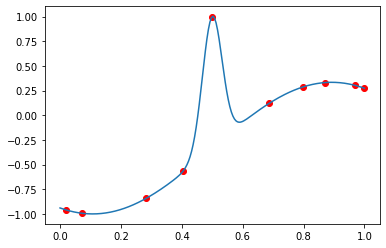

In [297]:
#Second model
X2=Y1
f2= lambda x: 2/3*np.sin(2*(2*x-1))+4/3*np.exp(-30*(2*(2*x-1))**2)-1/3  
Y2=np.array([f2(x) for x in X2]).reshape(-1,1)
Xt=np.linspace(0,1.,200)[:,None]
Yt=np.array([f2(x) for x in Xt]).flatten()
plt.plot(Xt,Yt)
plt.scatter(X2,Y2,color='r')

In [298]:
layer1=[kernel(length=np.array([1.]),name='matern2.5')]
layer2=[kernel(length=np.array([1.]),name='matern2.5',scale_est=True,connect=np.arange(1))]
all_layer=combine(layer1,layer2)
m2=dgp(X2,[Y2],all_layer)
m2.train(N=500)

Iteration 500: Layer 2: 100%|██████████| 500/500 [00:09<00:00, 50.37it/s]


In [299]:
final_layer_obj=m2.estimate()
emu=emulator(final_layer_obj)
mu2,var2=emu.predict(Xt, method='mean_var')
c2=container(final_layer_obj,local_input_idx=np.array([0]))

In [300]:
struc=[[c1],[c2]]
lm=lgp(struc)
z=np.linspace(0,1,300)[:,None].reshape(-1,1)
ml,vl=lm.predict(z)

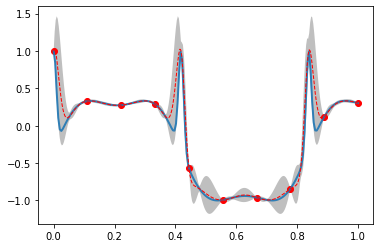

In [303]:
Yt=np.array([f2(f1(x)) for x in Xt]).flatten()
s=np.sqrt(vl[0])
u=ml[0]+2*s
l=ml[0]-2*s
plt.fill_between(z.flatten(), u.flatten(), l.flatten(),facecolor='grey',alpha=0.5)
plt.plot(Xt,Yt,lw=2,alpha=0.9)
p=plt.plot(z,ml[0],'--',color='r',alpha=1,lw=1)
plt.scatter(X1,Y2,color='r')

## Linked GP+DGP with independent design

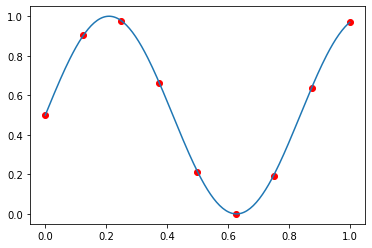

In [373]:
#First model
n=9
X1=np.linspace(0,1.,n)[:,None]
f1= lambda x: (np.sin(7.5*x)+1)/2
Y1=np.array([f1(x) for x in X1]).reshape(-1,1)
Xt=np.linspace(0,1.,200)[:,None]
Yt=np.array([f1(x) for x in Xt]).flatten()
plt.plot(Xt,Yt)
plt.scatter(X1,Y1,color='r')

In [374]:
m1=gp(X1,Y1,kernel(length=np.array([1.]),name='matern2.5',scale_est=True))
m1.train()
mu,var=m1.predict(Xt)

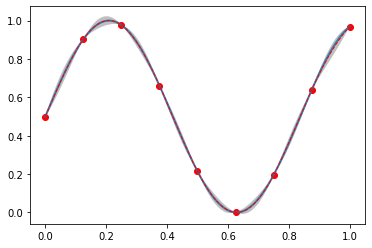

In [375]:
s=np.sqrt(var)
u=mu+2*s
l=mu-2*s
plt.fill_between(Xt.flatten(), u.flatten(), l.flatten(),facecolor='grey',alpha=0.5)
plt.plot(Xt,Yt,lw=2,alpha=0.9)
p=plt.plot(Xt,mu,'--',color='r',alpha=1,lw=1)
plt.scatter(X1,Y1,color='r')

In [376]:
c1=container(m1.export(),local_input_idx=np.array([0]))

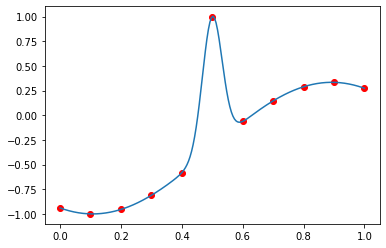

In [377]:
#Second model
n=11
X2=np.linspace(0,1.,n)[:,None]
f2= lambda x: 2/3*np.sin(2*(2*x-1))+4/3*np.exp(-30*(2*(2*x-1))**2)-1/3  
Y2=np.array([f2(x) for x in X2]).reshape(-1,1)
Xt=np.linspace(0,1.,200)[:,None]
Yt=np.array([f2(x) for x in Xt]).flatten()
plt.plot(Xt,Yt)
plt.scatter(X2,Y2,color='r')

In [378]:
layer1=[kernel(length=np.array([1.]),name='matern2.5')]
layer2=[kernel(length=np.array([1.]),name='matern2.5',scale_est=True,connect=np.arange(1))]
all_layer=combine(layer1,layer2)

In [379]:
m2=dgp(X2,[Y2],all_layer)
m2.train(N=500)

Iteration 500: Layer 2: 100%|██████████| 500/500 [00:10<00:00, 45.86it/s]


In [380]:
final_layer_obj=m2.estimate()
emu=emulator(final_layer_obj)
mu2,var2=emu.predict(Xt, method='mean_var')

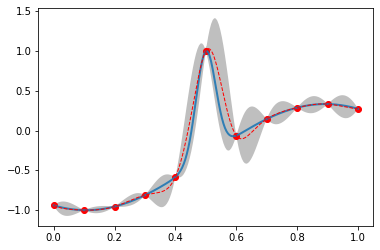

In [381]:
s=np.sqrt(var2)
u=mu2+2*s
l=mu2-2*s
plt.fill_between(Xt.flatten(), u.flatten(), l.flatten(),facecolor='grey',alpha=0.5)
plt.plot(Xt,Yt,lw=2,alpha=0.9)
p=plt.plot(Xt,mu2,'--',color='r',alpha=1,lw=1)
plt.scatter(X2,Y2,color='r')

In [382]:
c2=container(final_layer_obj,local_input_idx=np.array([0]))

In [383]:
struc=[[c1],[c2]]
lm=lgp(struc)

In [384]:
z=np.linspace(0,1,300)[:,None].reshape(-1,1)
ml,vl=lm.predict(z)

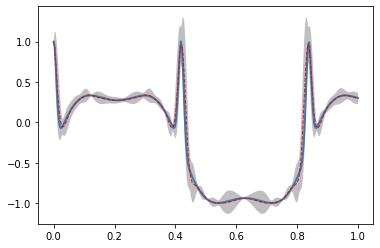

In [385]:
Yt=np.array([f2(f1(x)) for x in z]).flatten()
s=np.sqrt(vl[0])
u=ml[0]+2*s
l=ml[0]-2*s
plt.fill_between(z.flatten(), u.flatten(), l.flatten(),facecolor='grey',alpha=0.5)
plt.plot(z,Yt,lw=2,alpha=0.9)
p=plt.plot(z,ml[0],'--',color='r',alpha=1,lw=1)